<a href="https://colab.research.google.com/github/kavya-pv/CognoRise-InfoTech/blob/main/IRIS_FLOWER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ABOUT THE DATASET**

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

In [1]:
#import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df=pd.read_csv('/content/IRIS (1).csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### **DATA PREPROCESSING**

In [3]:
# Getting top 5 rows of Dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Getting last 5 rows of Dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Getting all columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#check the descriptive statistics of numeric variables
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#view the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#checking for missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
#checking duplicates values
df.duplicated().sum()

3

In [10]:
#removing duplicates rows
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(147, 5)

**DATA VISUALIZATION**

Text(0.5, 1.0, 'Distribution of Species')

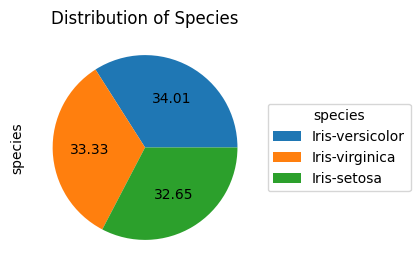

In [12]:
plt.figure(figsize=(5,3))
df["species"].value_counts().plot(kind='pie',autopct='%.2f',labels=None)
plt.legend(df["species"].value_counts().index, title="species", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Species")

Text(0.5, 1.0, 'Sepal length and Sepal width distribution of three flowers')

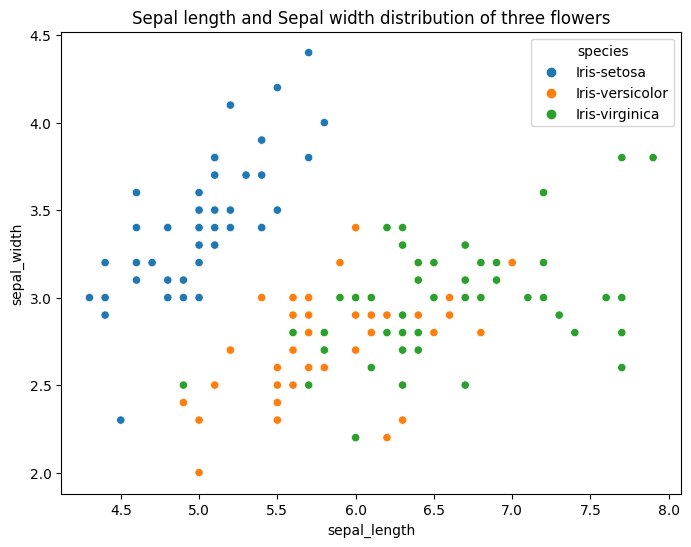

In [13]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=df.sepal_length,y=df.sepal_width,hue=df.species).set_title("Sepal length and Sepal width distribution of three flowers")

<Figure size 800x600 with 0 Axes>

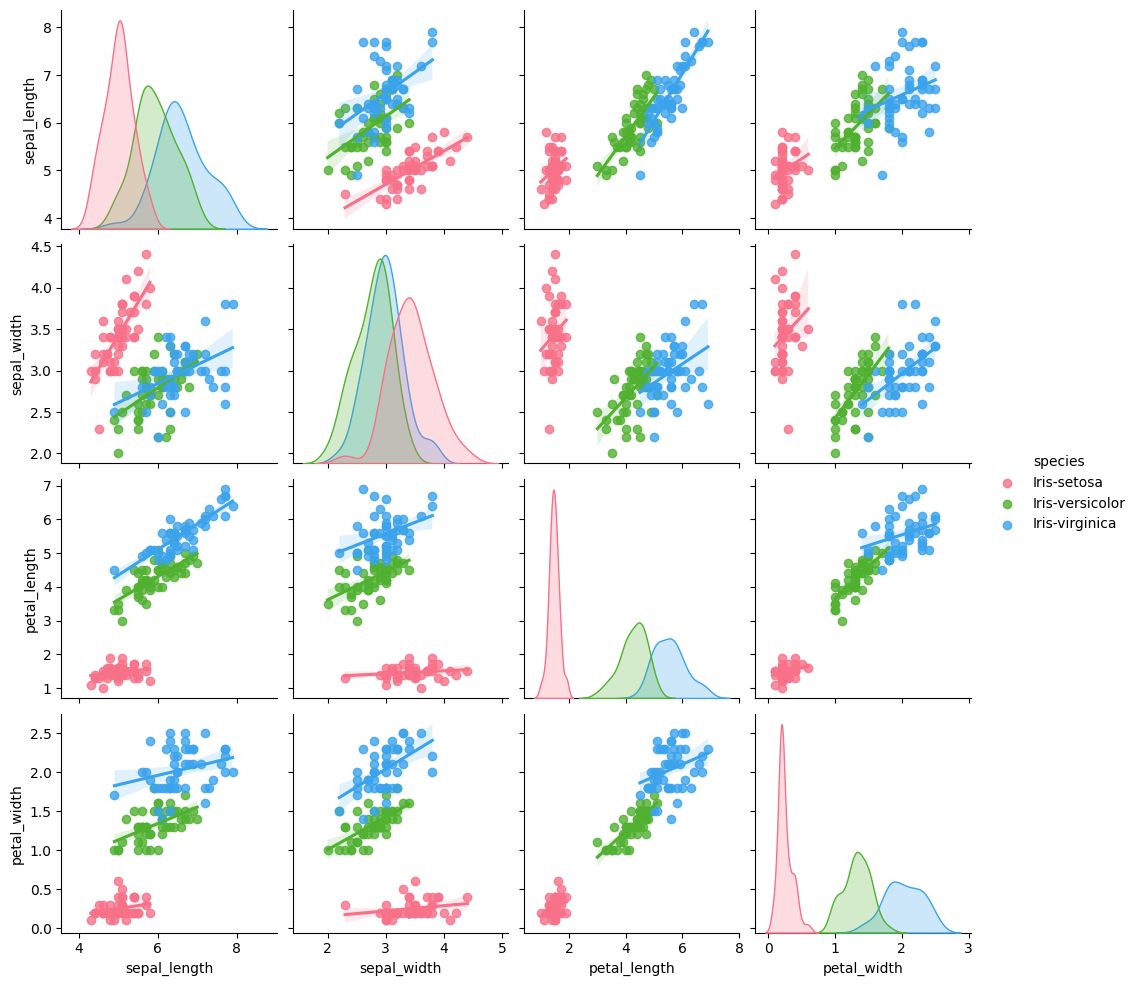

In [14]:
plt.figure(figsize=(8,6));
sns.pairplot(df,kind='reg',hue ='species',palette="husl" )

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

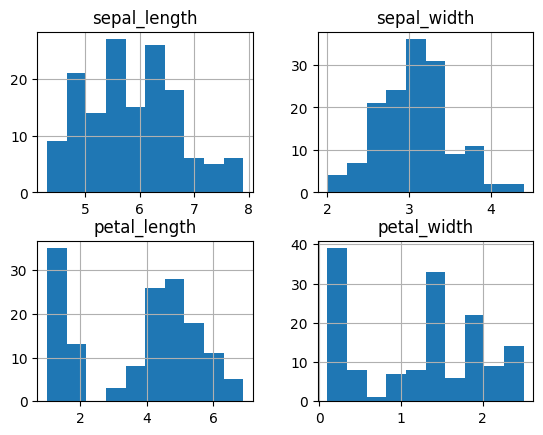

In [15]:
df.hist()

<ipython-input-16-8e3c60167342>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


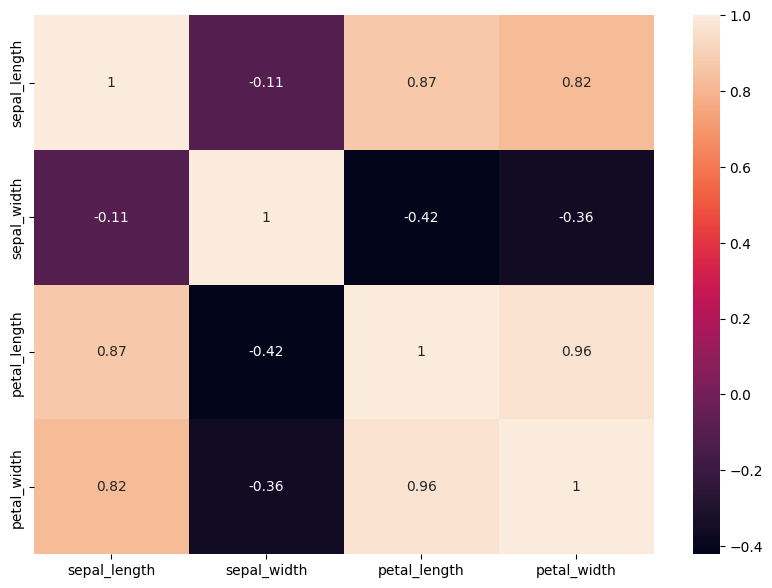

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

### **Spliting Independent and Dependent Features**

In [17]:
x=df.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [18]:
y=df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
    

### **MODEL SELECTION**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [20]:
x_train

array([[5.7, 3. , 4.2, 1.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.5, 3.2, 5.1, 2. ],
       [5.1, 3.5, 1.4, 0.2],
       [6.6, 3. , 4.4, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6. , 2.2, 4. , 1. ],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3.1, 4.7, 1.5],
       [6.7, 3. , 5.2, 2.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.3, 2.9, 5.6, 1.8],
       [4.5, 2.3, 1.3, 0.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.5, 3. , 5.5, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5.6, 2.9, 3.6, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.5, 2.4, 3.8, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 2.8, 4.1, 1.3],
       [6.4, 3

In [21]:
x_test

array([[6.1, 3. , 4.9, 1.8],
       [5.5, 2.3, 4. , 1.3],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3.8, 1.5, 0.3],
       [4.9, 2.5, 4.5, 1.7],
       [4.8, 3. , 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [6. , 2.7, 5.1, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.4, 1.6, 0.4],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 2.5, 5. , 1.9],
       [5.6, 2.5, 3.9, 1.1],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.2, 4.5, 1.5],
       [5.7, 3.8, 1.7, 0.3],
       [6.1, 2.8, 4. , 1.3],
       [6.2, 2.8, 4.8, 1.8],
       [4.8, 3.1, 1.6, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [4.4, 3. , 1.3, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [4.9, 2.4, 3.3, 1. ],
       [4.6, 3.6, 1. , 0.2],
       [5.6, 3. , 4.5, 1.5],
       [7.7, 3. , 6.1, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.6, 0.2],
       [6.4, 3.1, 5.5, 1.8],
       [4.6, 3.2, 1.4, 0.2],
       [5.6, 2.8, 4.9, 2. ],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3

In [22]:
y_train

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris

In [23]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### **SCALING/ NORMALIZATION**

In [24]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [25]:
x_train

array([[-0.23690478, -0.08738704,  0.20877397, -0.03330265],
       [ 1.16208031,  0.38174338,  1.19788343,  1.46132027],
       [ 0.78053892,  0.38174338,  0.73242015,  1.05369584],
       [-0.99998756,  1.085439  , -1.42034749, -1.39205076],
       [ 0.90771938, -0.08738704,  0.32513979,  0.23844697],
       [-0.10972432, -0.79108266,  0.15059106, -0.30505227],
       [-0.8728071 ,  0.85087379, -1.42034749, -1.39205076],
       [-1.8902508 ,  0.38174338, -1.4785304 , -1.39205076],
       [ 0.14463661, -1.9639087 ,  0.09240815, -0.30505227],
       [-1.38152895,  0.85087379, -1.12943294, -1.39205076],
       [-1.12716803, -0.08738704, -1.30398167, -1.39205076],
       [-0.99998756,  0.61630858, -1.24579876, -0.98442633],
       [ 0.14463661, -1.9639087 ,  0.67423724,  0.37432178],
       [ 1.03489985,  0.14717817,  0.49968851,  0.37432178],
       [ 1.03489985, -0.08738704,  0.79060306,  1.46132027],
       [-0.99998756,  1.78913462, -1.30398167, -1.39205076],
       [-0.23690478,  3.

In [26]:
x_test

array([[ 0.34307955, -0.21589908,  0.69064254,  0.78705882],
       [-0.31857387, -1.76154024,  0.19645486,  0.15908636],
       [ 1.00473297,  0.0049068 ,  1.07501074,  1.54062577],
       [-0.75967615,  1.55054796, -1.17628871, -1.09685856],
       [-0.98022729, -1.31992848,  0.47100357,  0.66146433],
       [-1.09050286, -0.21589908, -1.23119846, -1.34804755],
       [ 0.23280398, -0.43670496,  0.47100357,  0.41027534],
       [-0.42884944,  0.66732444, -1.17628871, -0.97126407],
       [ 0.23280398, -0.87831672,  0.80046203,  0.53586983],
       [-0.98022729,  0.0049068 , -1.17628871, -1.34804755],
       [-0.86995172,  0.66732444, -1.12137897, -0.97126407],
       [-0.75967615, -1.31992848, -0.35264257, -0.09210263],
       [ 0.56363069, -1.31992848,  0.74555229,  0.91265331],
       [-0.2082983 , -1.31992848,  0.14154512, -0.09210263],
       [ 0.56363069,  0.66732444,  1.07501074,  1.54062577],
       [ 0.45335512, -1.98234612,  0.47100357,  0.41027534],
       [-0.09802273,  1.

### **MODEL CREATION**

### **1 Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(n_estimators=100)
forest_model.fit(x_train,y_train)
y_pred=forest_model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [28]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
print(result)
labels=['Iris-versicolor','Iris-setosa','Iris-virginica']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]


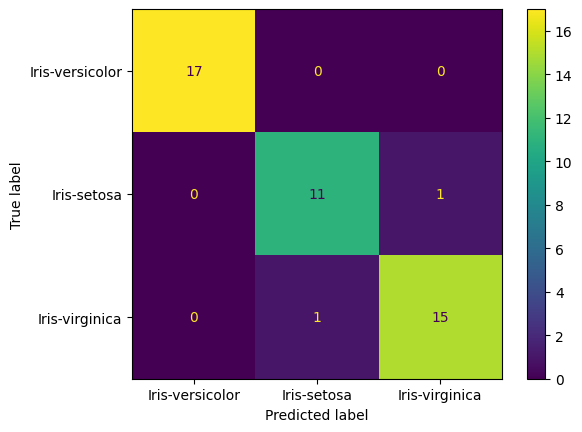

In [29]:
cmd.plot()

In [30]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy 95.55555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



### **2 Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
y_pred1


array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred1)
print(result)
labels=['Iris-versicolor','Iris-setosa','Iris-virginica']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[17  0  0]
 [ 0 10  2]
 [ 0  0 16]]


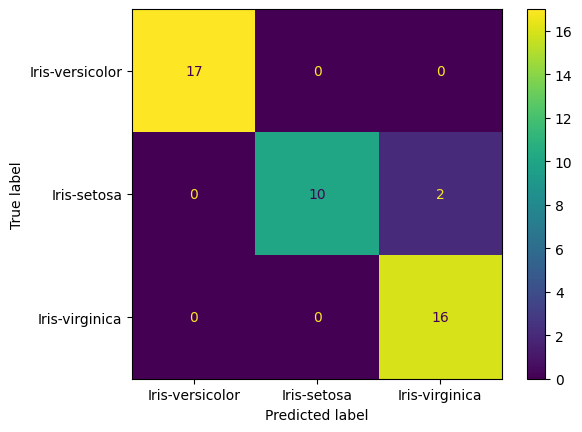

In [33]:
cmd.plot()

In [34]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy',accuracy_score(y_test,y_pred1)*100)
print(classification_report(y_test,y_pred1))

Accuracy 95.55555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.89      1.00      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.94      0.95        45
   weighted avg       0.96      0.96      0.95        45



### **3 Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred2=dt_model.predict(x_test)
y_pred2

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred2)
print(result)
labels=['Iris-versicolor','Iris-setosa','Iris-virginica']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


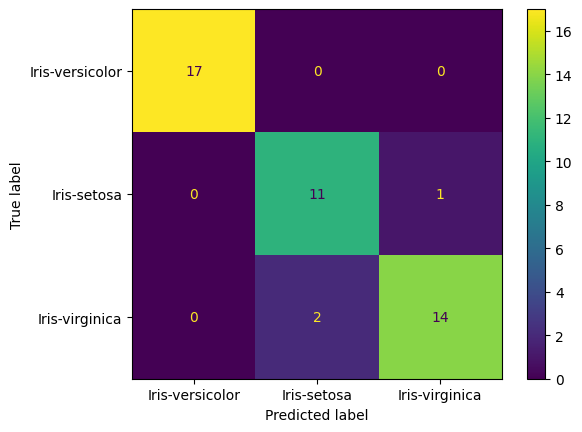

In [37]:
cmd.plot()

In [38]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy',accuracy_score(y_test,y_pred2)*100)
print(classification_report(y_test,y_pred2))

Accuracy 93.33333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

